In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Kaggle dataset: https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression

data = pd.read_csv('/content/Salary_dataset.csv')

df = pd.DataFrame(data)

df.head(7)

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0


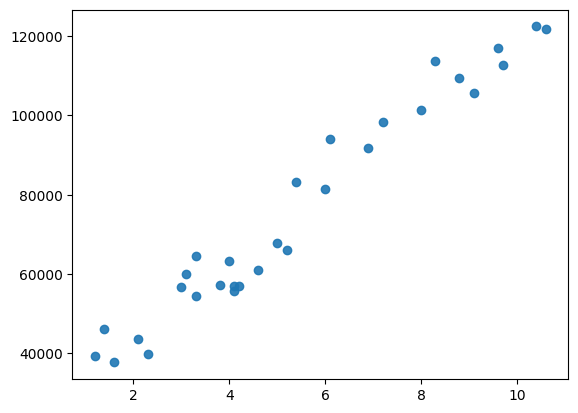

In [ ]:
    X = np.array(df.YearsExperience)
    Y = np.array(df.Salary)

    plt.scatter(X, Y, alpha=0.9)
    plt.show()


In [ ]:
X = np.array(df.YearsExperience).reshape(-1, 1)  # X necesita estar en una forma de 2D (matriz)
Y = np.array(df.Salary)

In [ ]:
model = LinearRegression()

model.fit(X, Y)

LinearRegression()

In [ ]:
print("SLOPE / COEF:", round(model.coef_[0],2), "INTERCEPT / BIAS:", round(model.intercept_, 2))

SLOPE / COEF: 9449.96 INTERCEPT / BIAS: 24848.2


In [ ]:
prediction = model.predict([[15]])
print(f"Predicción del salario anual para 15 años de experiencia: {prediction.round()}")

Predicción del salario anual para 15 años de experiencia: [166598.]


In [ ]:
y_pred = model.predict(X)
print(f"Predicción del salario anual cada año en eje X: {y_pred.round()}")

Predicción del salario anual cada año en eje X: [ 36188.  38078.  39968.  44693.  46583.  53198.  54143.  56033.  56033.
  60758.  62648.  63593.  63593.  64538.  68318.  72098.  73988.  75878.
  81548.  82493.  90053.  92888. 100448. 103283. 108008. 110843. 115568.
 116513. 123128. 125018.]


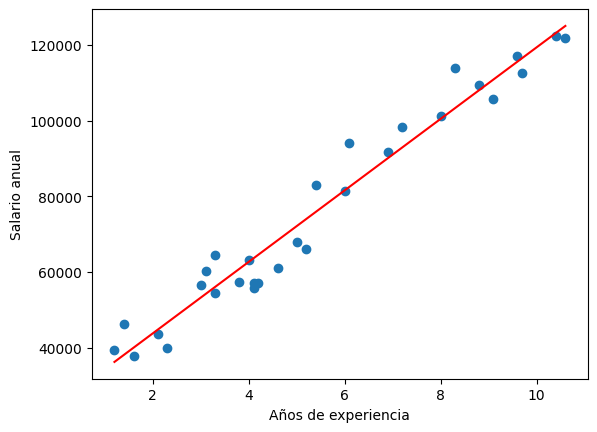

In [ ]:
# Crear un gráfico de dispersión con los datos de "YearsExperience" en el eje x y "Salary" en el eje y
plt.scatter(df["YearsExperience"], df["Salary"])

# Superponer la línea de regresión del modelo en el gráfico
plt.plot(df["YearsExperience"], model.predict(df[["YearsExperience"]]), color="red")

# Agregar etiquetas al eje x y al eje y para mayor claridad
plt.xlabel("Años de experiencia")  # Etiqueta del eje x
plt.ylabel("Salario anual")  # Etiqueta del eje y

# Mostrar el gráfico
plt.show()

In [ ]:
# Obtener los valores predichos (y_pred) para todos los datos de YearsExperience
y_pred = model.predict(X)

# Valores reales (y_true) son simplemente los salarios del dataset
y_true = Y

In [ ]:
print("Valores reales (y_true):", y_true)
print("Valores predichos (y_pred):", [round(x, 2) for x in y_pred])

Valores reales (y_true): [ 39344.  46206.  37732.  43526.  39892.  56643.  60151.  54446.  64446.
  57190.  63219.  55795.  56958.  57082.  61112.  67939.  66030.  83089.
  81364.  93941.  91739.  98274. 101303. 113813. 109432. 105583. 116970.
 112636. 122392. 121873.]
Valores predichos (y_pred): [np.float64(36188.16), np.float64(38078.15), np.float64(39968.14), np.float64(44693.12), np.float64(46583.12), np.float64(53198.09), np.float64(54143.09), np.float64(56033.08), np.float64(56033.08), np.float64(60758.06), np.float64(62648.05), np.float64(63593.05), np.float64(63593.05), np.float64(64538.05), np.float64(68318.03), np.float64(72098.02), np.float64(73988.01), np.float64(75878.0), np.float64(81547.98), np.float64(82492.97), np.float64(90052.94), np.float64(92887.93), np.float64(100447.9), np.float64(103282.89), np.float64(108007.87), np.float64(110842.86), np.float64(115567.84), np.float64(116512.84), np.float64(123127.81), np.float64(125017.8)]


In [ ]:
# Cálculo manual del error cuadratico
cost_function = ((y_true - y_pred)**2)
print("Error Cuadrático Medio calculado manualmente:", cost_function)

Error Cuadrático Medio calculado manualmente: [9.95933398e+06 6.60619258e+07 5.00033856e+06 1.36218040e+06
 4.47710508e+07 1.18673985e+07 3.60950167e+07 2.51882174e+06
 7.07772292e+07 1.27310578e+07 3.25980189e+05 6.08095758e+07
 4.40238817e+07 5.55926177e+07 5.19268777e+07 1.72974105e+07
 6.33298919e+07 5.19985138e+07 3.38478659e+04 1.31057296e+08
 2.84278489e+06 2.90097212e+07 7.31191669e+05 1.10883191e+08
 2.02813943e+06 2.76661387e+07 1.96604635e+06 1.50298766e+07
 5.41419461e+05 9.88979581e+06]


**MSE (Error Cuadrático Medio)**
*   Es el promedio de los errores al cuadrado.
*   Penaliza más los errores grandes.

✅ Un valor bajo significa que las predicciones están cerca de los valores reales.

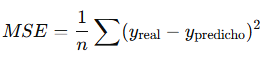




In [ ]:
# Error cuadrático medio (Mean Squared Error - MSE)
mse = mean_squared_error(y_true, y_pred)
print("Error cuadrático medio (MSE):", mse.round())

Error cuadrático medio (MSE): 31270952.0


**RMSE (Raíz del Error Cuadrático Medio)**

🔹 Es la raíz cuadrada del MSE, lo que lo hace más interpretable porque tiene las mismas unidades que el salario.

✅ Un error típico de 5,592 significa que las predicciones, en promedio, están a ±5,592 del valor real.

🔍 Ejemplo: Si el salario real es 60,000
 el modelo podría predecir algo entre
54
,
408
 y
65
,
592
65,592.

In [ ]:
# Calcular la Raíz Cuadrada del Error Cuadrático Medio (RMSE)
rmse = np.sqrt(mse)
print("Raíz Cuadrada del Error Cuadrático Medio (RMSE):", rmse.round())

Raíz Cuadrada del Error Cuadrático Medio (RMSE): 5592.0


**MAE (Error Absoluto Medio)**

🔹 Es el promedio del error absoluto, sin elevarlo al cuadrado.

✅ Indica que, en promedio, el modelo se equivoca en 4,644 unidades monetarias.

🔍 Ejemplo: Si el salario real es
70
,
000 el modelo podría dar
74
,
644 o
65
,
356.

In [ ]:
# Error absoluto medio (Mean Absolute Error - MAE)
mae = mean_absolute_error(y_true, y_pred)
print("Error absoluto medio (MAE):", mae.round())

Error absoluto medio (MAE): 4644.0


**Max Abs Error (Error Máximo Absoluto)**

🔹 Es el peor error del modelo en una sola predicción.

✅ Significa que, en el peor caso, una predicción se alejó hasta 11,448 del valor real.

🔍 Ejemplo: Si el salario real era
80
,
000
 la predicción más incorrecta podría haber sido
68
,
552
o
91
,
448
.

In [ ]:
# Error absoluto máximo (Max Absolute Error)
max_abs_error = np.max(np.abs(y_true - y_pred))
print("Error absoluto máximo:", max_abs_error.round())

Error absoluto máximo: 11448.0


**R² (Coeficiente de Determinación)**

🔹 Indica qué porcentaje de la variabilidad en el salario se explica con los años de experiencia.

✅ Un valor de 95.70% significa que el modelo explica casi toda la relación entre salario y experiencia (realmente estamos considerando a un valor más cercano a 1).

🔍 Ejemplo: Si el salario dependiera de más factores (como educación o habilidades), el
𝑅
2
  bajaría porque el modelo no los considera.

In [ ]:
# Coeficiente de determinación R2 (R2 Score)
r2 = r2_score(y_true, y_pred)
print("Coeficiente de determinación R2:", r2)

Coeficiente de determinación R2: 0.9569566641435086


**R² Ajustado**

🔹 Similar a
𝑅
2
 , pero ajustado para evitar sobreajuste cuando hay más variables.

✅ Al ser casi igual al
𝑅
2
 , indica que el modelo es sólido y no necesita más variables.

In [ ]:
# Coeficiente de determinación ajustado (Adjusted R2)
n = len(y_true)  # Número de puntos de datos
p = 1  # Número de predictores (en este caso solo etsamos usando 1 variable)
r2_ajustado = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Coeficiente de determinación ajustado R2:", r2_ajustado)

Coeficiente de determinación ajustado R2: 0.9554194021486339


**MAPE (Error Porcentual Medio Absoluto)**

🔹 Indica cuánto error tiene el modelo en porcentaje respecto al salario real.

✅ Un 7.05% de error es bastante bueno (menos del 10% es excelente).

🔍 Ejemplo: Si el salario real es
50
,
000, la predicción puede estar desviada en aproximadamente
3
,
525 unidades.

In [ ]:
# Error absoluto medio porcentual (Mean Absolute Percentage Error - MAPE)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print("Error absoluto medio porcentual (MAPE):", mape)

Error absoluto medio porcentual (MAPE): 7.047915917264219


# ✨Regresión Polinómica Simple

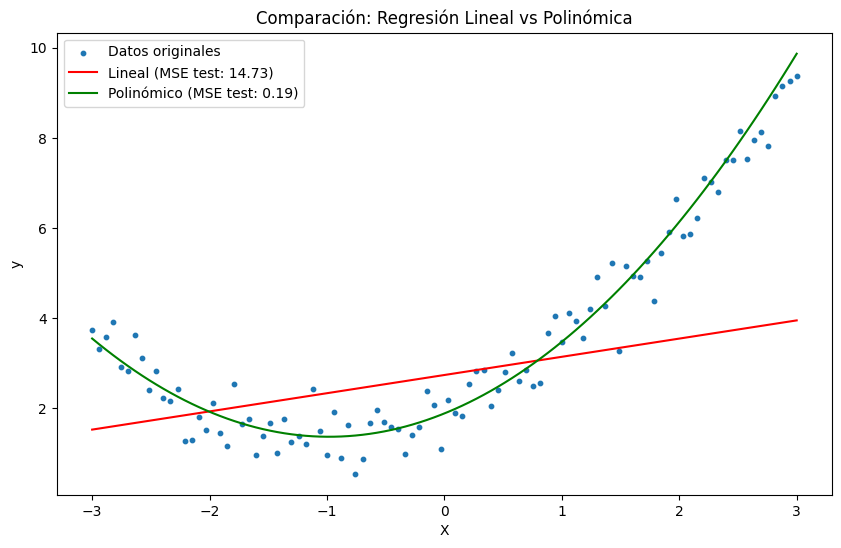


Coeficientes del modelo polinómico:
Intercepto (b0): 1.89
Coef para X (b1): 1.05
Coef para X² (b2): 0.54


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Generamos datos sintéticos con una relación cuadrática
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 0.5 * X**2 + X + 2 + np.random.normal(0, 0.5, size=(100, 1))

# Dividimos en train y test
X_train, y_train = X[:80], y[:80]
X_test, y_test = X[80:], y[80:]

# 1. Regresión Lineal Simple (sin polynomial features)
modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train, y_train)
# Predecimos para todo X para graficar la línea completa
y_pred_lineal = modelo_lineal.predict(X)

# 2. Regresión con Polynomial Features (grado 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

modelo_poly = LinearRegression()
modelo_poly.fit(X_poly_train, y_train)
# Predecimos para todo X transformado a polinómico
X_poly = poly.transform(X)
y_pred_poly = modelo_poly.predict(X_poly)

# Calculamos MSE solo para los puntos de test
mse_lineal = mean_squared_error(y_test, modelo_lineal.predict(X_test))
mse_poly = mean_squared_error(y_test, modelo_poly.predict(X_poly_test))

# Visualización
plt.figure(figsize=(10, 6))
plt.scatter(X, y, s=10, label='Datos originales')
plt.plot(X, y_pred_lineal, 'r-', label=f'Lineal (MSE test: {mse_lineal:.2f})')
plt.plot(X, y_pred_poly, 'g-', label=f'Polinómico (MSE test: {mse_poly:.2f})')
plt.legend()
plt.title('Comparación: Regresión Lineal vs Polinómica')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

# Coeficientes del modelo polinómico
print("\nCoeficientes del modelo polinómico:")
print(f"Intercepto (b0): {modelo_poly.intercept_[0]:.2f}")
print(f"Coef para X (b1): {modelo_poly.coef_[0][0]:.2f}")
print(f"Coef para X² (b2): {modelo_poly.coef_[0][1]:.2f}")

# ✨ Regresión lineal múltiple

In [ ]:
from sklearn.datasets import fetch_california_housing

# Cargar el dataset
housing = fetch_california_housing()

# Ver la descripción del dataset
print(housing.DESCR)

# Ver las características (features)
print("\nCaracterísticas (features):")
print(housing.feature_names)
print(housing.data)

# Ver la variable objetivo (target)
print("\nVariable objetivo (target):")
print(housing.target_names)
print(housing.target)

# Ver la forma de los datos (número de muestras y características)
print("\nForma de los datos:")
print("Data shape:", housing.data.shape)
print("Target shape:", housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [ ]:
import pandas as pd

# Convertir a DataFrame
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target

# Mostrar las primeras filas
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


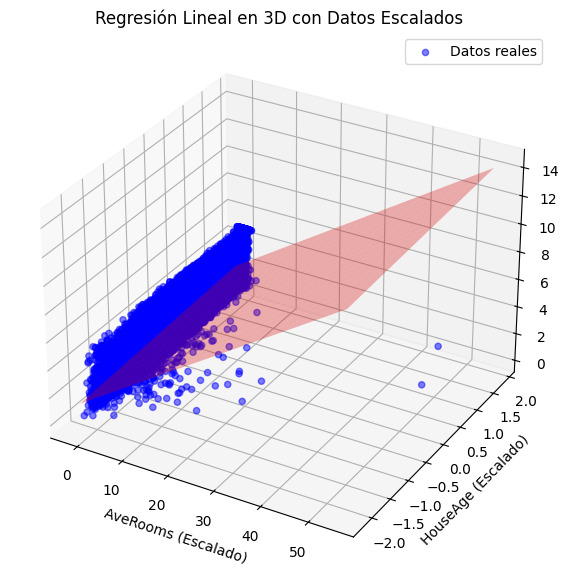

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing

# Cargar el dataset
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target

# Seleccionar dos variables predictoras y la variable objetivo
X = df[['AveRooms', 'HouseAge']]
y = df['MedHouseVal']

# Escalar las variables predictoras para mejorar la prediccion y estabilidad del modelo.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Obtener los coeficientes del modelo
b0 = model.intercept_
b1, b2 = model.coef_

# Crear una malla para graficar el hiperplano
x1_range = np.linspace(X_scaled[:, 0].min(), X_scaled[:, 0].max(), 20)
x2_range = np.linspace(X_scaled[:, 1].min(), X_scaled[:, 1].max(), 20)
X1, X2 = np.meshgrid(x1_range, x2_range)
Y_pred = b0 + b1 * X1 + b2 * X2

# Graficar los puntos de datos y el hiperplano
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], y, color='blue', alpha=0.5, label='Datos reales')
ax.plot_surface(X1, X2, Y_pred, color='red', alpha=0.3)

# Etiquetas
ax.set_xlabel('AveRooms (Escalado)')
ax.set_ylabel('HouseAge (Escalado)')
ax.set_zlabel('MedHouseVal')
ax.set_title('Regresión Lineal en 3D con Datos Escalados')
ax.legend()

plt.show()



# ✨ Regresión Polinómica Múltiple

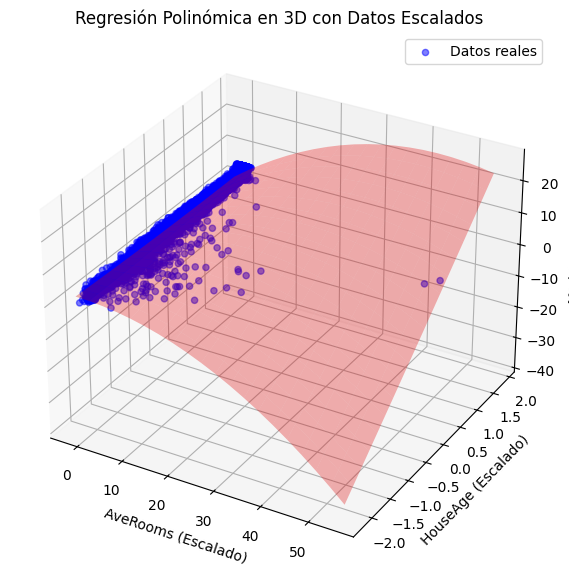

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing

# Cargar el dataset
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target

# Seleccionar dos variables predictoras y la variable objetivo
X = df[['AveRooms', 'HouseAge']]
y = df['MedHouseVal']

# Escalar las variables predictoras
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Transformar las variables en polinomiales
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Obtener los coeficientes del modelo
b0 = model.intercept_
coefficients = model.coef_

# Crear una malla para graficar el hiperplano
x1_range = np.linspace(X_scaled[:, 0].min(), X_scaled[:, 0].max(), 20)
x2_range = np.linspace(X_scaled[:, 1].min(), X_scaled[:, 1].max(), 20)
X1, X2 = np.meshgrid(x1_range, x2_range)
X_poly_mesh = poly.transform(np.column_stack([X1.ravel(), X2.ravel()]))
Y_pred = model.predict(X_poly_mesh).reshape(X1.shape)

# Graficar los puntos de datos y el hiperplano
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], y, color='blue', alpha=0.5, label='Datos reales')
ax.plot_surface(X1, X2, Y_pred, color='red', alpha=0.3)

# Etiquetas
ax.set_xlabel('AveRooms (Escalado)')
ax.set_ylabel('HouseAge (Escalado)')
ax.set_zlabel('MedHouseVal')
ax.set_title('Regresión Polinómica en 3D con Datos Escalados')
ax.legend()

plt.show()



### 🦾 Sin Train-test Split

#### **Casos en los que NO es estrictamente necesario:**
1. **Exploración inicial o análisis descriptivo**:  
   - Si solo estás explorando la relación entre variables (sin predecir), no necesitas dividir los datos.

2. **Conjuntos de datos muy pequeños**:  
   - Si tienes pocos datos (ej: < 30 muestras), dividirlos puede dejar muy pocas observaciones para entrenar o evaluar. En estos casos, podrías usar **validación cruzada (cross-validation)** en lugar de `train_test_split`.

3. **Cuando ya tienes datos de prueba separados**:  
   - Algunos proyectos tienen un conjunto de prueba predefinido (ej: competiciones de Kaggle).

4. **Modelos simples con pocos datos y bajo riesgo de overfitting**:  
   - Si usas una regresión lineal simple (1 variable) y los datos son claramente lineales, el modelo puede no sobreajustarse, pero igual es recomendable validar.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Cargar datos
housing = fetch_california_housing()
X = housing.data
y = housing.target

scaler =  StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_scaled, y_scaled)
y_pred = model.predict(X_scaled)
print("MSE:", mean_squared_error(y_scaled, y_pred))

MSE: 0.3937673148001949


In [ ]:
print("Scikit-learn coef_:", model.coef_, "intercept_:", model.intercept_)

Scikit-learn coef_: [[ 0.71895227  0.10291078 -0.23010693  0.26491789 -0.00390232 -0.03408034
  -0.77984545 -0.75441522]] intercept_: [-7.07535521e-15]


### 🦾 Con Train test split

#### **Casos en los que SÍ se recomienda `train_test_split`:**
1. **Evaluación del modelo**:  
   - Si quieres medir qué tan bien generaliza tu modelo a datos no vistos, necesitas un conjunto de prueba (`test set`).  
   - Métricas como **R², MSE, RMSE o MAE** deben calcularse en datos independientes para evitar sobreestimación del rendimiento.

2. **Evitar overfitting**:  
   - Si ajustas y evalúas el modelo con los mismos datos, podrías creer que funciona mejor de lo que realmente lo hace (sobreajuste).  
   - La división en entrenamiento/prueba ayuda a detectar esto.

3. **Modelos complejos o con muchos predictores**:  
   - En regresiones con muchas variables o términos polinómicos, el riesgo de overfitting es alto, por lo que `train_test_split` (o mejor aún, validación cruzada) es casi obligatorio.


In [ ]:
# Dividir en train/test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print("MSE:", mean_squared_error(y_test, y_pred))

MSE: 0.5558915986952442


In [ ]:
print("Scikit-learn coef_:", model.coef_, "intercept_:", model.intercept_)

Scikit-learn coef_: [ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178] intercept_: 2.071946937378619
